In [1]:
import sys
from pathlib import Path

# Project root (one level ABOVE src)
PROJ_ROOT = Path(r"C:\Users\quantbase\Desktop\SyStrat_factmod")

if str(PROJ_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJ_ROOT))

print("Project root on sys.path:", PROJ_ROOT in map(Path, map(str, sys.path)))

from src.fm_config import DATA_INT
print("DATA_INT =", DATA_INT)


Project root on sys.path: True
DATA_INT = C:\Users\quantbase\Desktop\SyStrat_factmod\data_int


In [2]:
import sys
from pathlib import Path

import numpy as np      # already in env — no new install
import pandas as pd     # already in env — no new install
import matplotlib.pyplot as plt  # already in env — no new install

# Project root and src import
PROJ_ROOT = Path(r"C:\Users\quantbase\Desktop\SyStrat_factmod")
if str(PROJ_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJ_ROOT))

from src.fm_config import DATA_INT   # no installation needed

pd.set_option("display.max_columns", None)


In [3]:
EDA_DIR = PROJ_ROOT / "reports" / "eda"
EDA_DIR.mkdir(parents=True, exist_ok=True)

In [4]:
# Factor returns (K factors × T dates)
fac_ret = pd.read_parquet(DATA_INT / "factor_returns_us.parquet")

# Residuals (N assets × T dates)
eps = pd.read_parquet(DATA_INT / "factor_residuals_us.parquet")

# Covariance matrix (K × K)
cov = pd.read_parquet(DATA_INT / "factor_cov_us.parquet")

fac_ret.head(), eps.head(), cov

(              market  sector_Communication Services  \
 date                                                  
 2021-11-02  0.001730                       0.001861   
 2021-11-03  0.004885                       0.006107   
 2021-11-04  0.007573                       0.001382   
 2021-11-05  0.005470                      -0.002796   
 2021-11-08  0.003165                      -0.005304   
 
             sector_Consumer Discretionary  sector_Consumer Staples  \
 date                                                                 
 2021-11-02                      -0.006513                 0.003607   
 2021-11-03                       0.011467                 0.001578   
 2021-11-04                       0.009735                 0.000330   
 2021-11-05                      -0.004071                -0.004284   
 2021-11-08                      -0.011729                -0.013222   
 
             sector_Energy  sector_Financials  sector_Health Care  \
 date                                 

In [5]:
#------BASIC STATS/factor

In [6]:
# Assume these are daily factor returns; adjust if you changed frequency
trading_days = 252

mu = fac_ret.mean()
sigma = fac_ret.std()
sharpe = (mu * trading_days) / (sigma * np.sqrt(trading_days))

summary = pd.DataFrame({
    "mean_daily": mu,
    "vol_daily": sigma,
    "ann_mean": mu * trading_days,
    "ann_vol": sigma * np.sqrt(trading_days),
    "ann_sharpe": sharpe,
})

summary

,mean_daily,vol_daily,ann_mean,ann_vol,ann_sharpe
market,0.000631,0.010248,0.158890,0.162676,0.976730
sector_Communication Services,0.000082,0.008221,0.020770,0.130505,0.159154
sector_Consumer Discretionary,-0.000341,0.007701,-0.085975,0.122243,-0.703314
sector_Consumer Staples,-0.000055,0.007401,-0.013933,0.117488,-0.118589
sector_Energy,0.000220,0.010722,0.055372,0.170214,0.325306
sector_Financials,-0.000049,0.007409,-0.012282,0.117612,-0.104432
sector_Health Care,-0.000133,0.006433,-0.033575,0.102125,-0.328769
sector_Industrials,0.000241,0.006824,0.060667,0.108330,0.560021
sector_Information Technology,-0.000004,0.007709,-0.000957,0.122377,-0.007820
sector_Materials,0.000039,0.007876,0.009914,0.125032,0.079288


In [7]:
summary.sort_values("ann_sharpe", ascending=False)

,mean_daily,vol_daily,ann_mean,ann_vol,ann_sharpe
EMA20_GAP,0.004262,0.004304,1.073976,0.068326,15.718468
market,0.000631,0.010248,0.158890,0.162676,0.976730
VAL,0.000145,0.002703,0.036552,0.042912,0.851785
SIZE,0.000213,0.005578,0.053659,0.088548,0.605985
sector_Industrials,0.000241,0.006824,0.060667,0.108330,0.560021
sector_Energy,0.000220,0.010722,0.055372,0.170214,0.325306
sector_Communication Services,0.000082,0.008221,0.020770,0.130505,0.159154
VOL_Z,0.000053,0.006043,0.013351,0.095935,0.139167
sector_Materials,0.000039,0.007876,0.009914,0.125032,0.079288
sector_Information Technology,-0.000004,0.007709,-0.000957,0.122377,-0.007820


In [8]:
#-------Time series plot----------

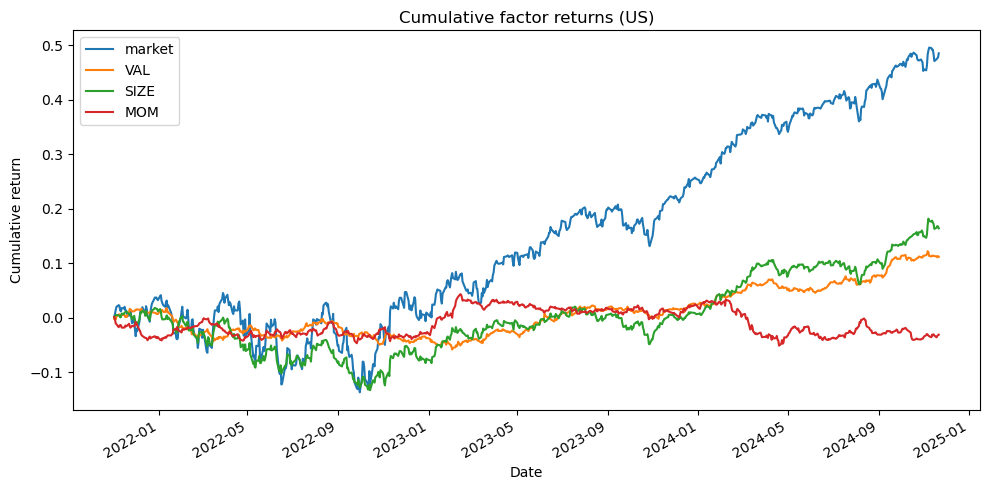

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

fac_ret[["market", "VAL", "SIZE", "MOM"]].cumsum().plot(ax=ax)
ax.set_title("Cumulative factor returns (US)")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative return")
plt.tight_layout()
plt.show()

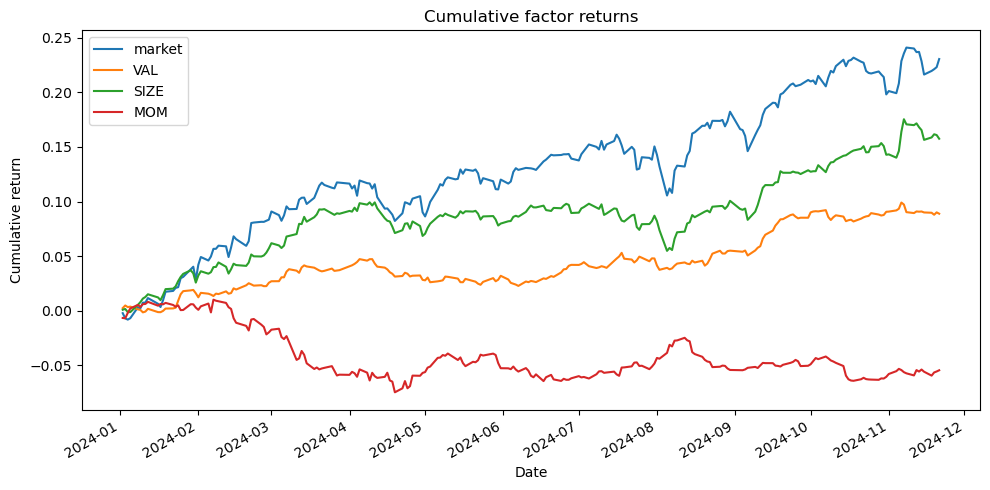

In [10]:
fac_ret.loc["2024-01-01":"2025-01-31", ["market", "VAL", "SIZE", "MOM"]].cumsum().plot(figsize=(10, 5))
plt.title("Cumulative factor returns")
plt.xlabel("Date")
plt.ylabel("Cumulative return")
plt.tight_layout()
plt.show()

In [11]:
#---------Hisgtograms/factor

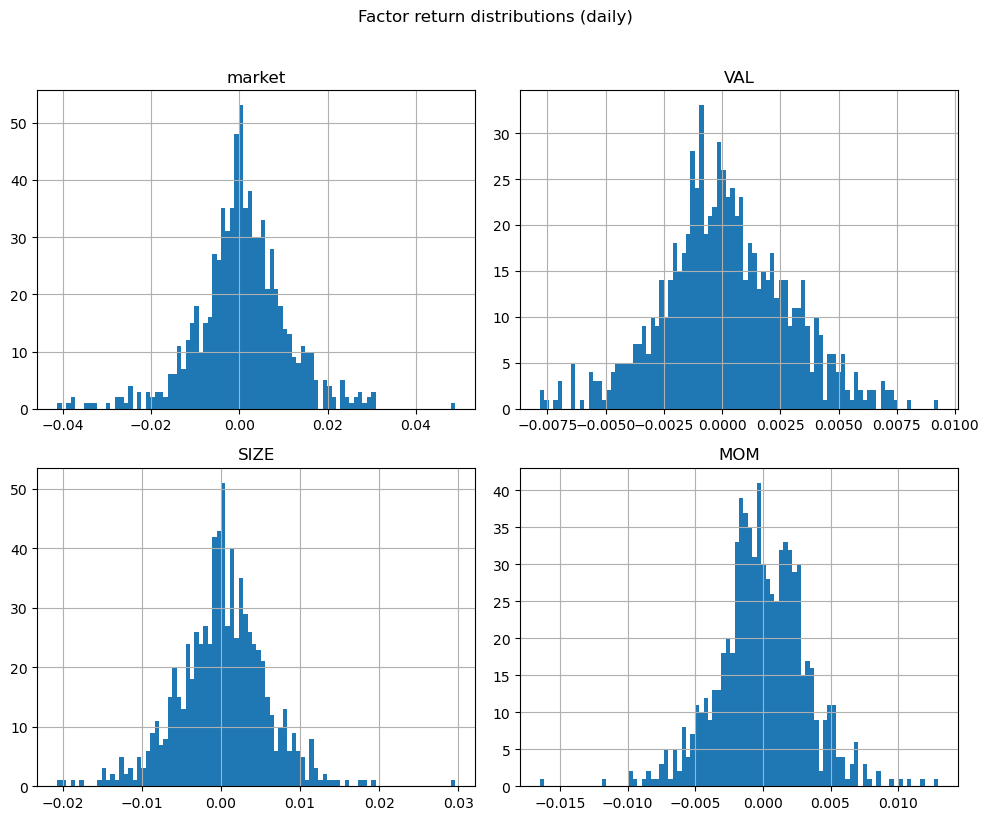

In [12]:
fac_ret[["market", "VAL", "SIZE", "MOM"]].hist(bins=90, figsize=(10, 8))
plt.suptitle("Factor return distributions (daily)", y=1.02)
plt.tight_layout()
plt.show()

In [13]:
dist_stats = pd.DataFrame({
    "skew": fac_ret.skew(),
    "kurtosis_excess": fac_ret.kurtosis(),  # excess kurtosis
})
dist_stats

,skew,kurtosis_excess
market,-0.174895,2.182543
sector_Communication Services,-0.026626,1.565841
sector_Consumer Discretionary,0.010215,0.689541
sector_Consumer Staples,0.190403,1.608134
sector_Energy,0.077965,-0.188315
sector_Financials,-0.061707,0.617262
sector_Health Care,0.270517,0.875201
sector_Industrials,-0.297696,0.820411
sector_Information Technology,-0.035140,1.168954
sector_Materials,-0.028942,0.637198


In [14]:
#-----Covariance

In [15]:
# Correlation matrix from factor returns
corr = fac_ret.corr()

corr

,market,sector_Communication Services,sector_Consumer Discretionary,sector_Consumer Staples,sector_Energy,sector_Financials,sector_Health Care,sector_Industrials,sector_Information Technology,sector_Materials,EMA20_GAP,LIQ,MOM,QUAL,SIZE,VAL,VOL_Z
market,1.000000,0.396326,0.426796,-0.570304,-0.222521,0.096168,-0.535671,-0.074105,0.473588,-0.044380,-0.061380,-0.402461,0.189726,-0.010147,0.897426,0.002927,0.694922
sector_Communication Services,0.396326,1.000000,0.501758,-0.411614,-0.500127,-0.105897,-0.405876,-0.389785,0.598140,-0.283298,-0.144166,-0.282717,0.012007,0.139197,0.600574,-0.123702,0.510183
sector_Consumer Discretionary,0.426796,0.501758,1.000000,-0.367801,-0.433358,-0.159720,-0.467021,-0.294274,0.580122,-0.346985,-0.107273,-0.060437,-0.062406,-0.146995,0.532100,-0.177363,0.556672
sector_Consumer Staples,-0.570304,-0.411614,-0.367801,1.000000,0.008407,-0.143185,0.600209,-0.104273,-0.491805,0.054271,0.035622,0.315727,-0.173155,-0.047079,-0.595818,-0.151581,-0.691265
sector_Energy,-0.222521,-0.500127,-0.433358,0.008407,1.000000,-0.165805,0.044382,0.317073,-0.491788,-0.097214,0.098706,0.195490,0.132595,-0.137272,-0.339841,0.593575,-0.175622
sector_Financials,0.096168,-0.105897,-0.159720,-0.143185,-0.165805,1.000000,-0.096234,-0.083739,-0.138007,-0.027471,0.067708,-0.156814,-0.117272,0.085864,0.066967,-0.230883,0.015798
sector_Health Care,-0.535671,-0.405876,-0.467021,0.600209,0.044382,-0.096234,1.000000,-0.088179,-0.476325,0.072177,0.073481,0.060840,-0.062443,0.197697,-0.526673,-0.202546,-0.563583
sector_Industrials,-0.074105,-0.389785,-0.294274,-0.104273,0.317073,-0.083739,-0.088179,1.000000,-0.294362,-0.066629,0.017643,0.056162,0.109461,-0.199167,-0.234118,0.297107,-0.148664
sector_Information Technology,0.473588,0.598140,0.580122,-0.491805,-0.491788,-0.138007,-0.476325,-0.294362,1.000000,-0.264718,-0.053091,-0.054440,0.169507,0.064523,0.589417,-0.218986,0.565212
sector_Materials,-0.044380,-0.283298,-0.346985,0.054271,-0.097214,-0.027471,0.072177,-0.066629,-0.264718,1.000000,0.000478,-0.106187,-0.068753,0.096705,-0.131447,-0.023578,-0.167065


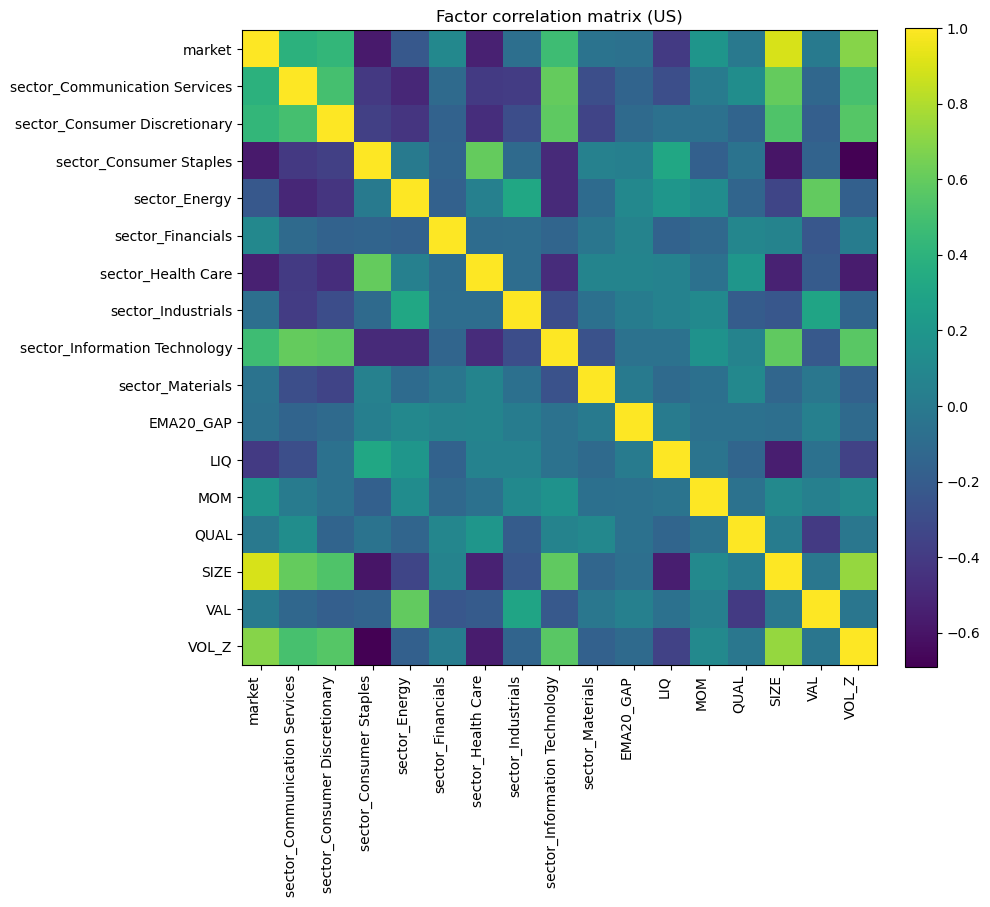

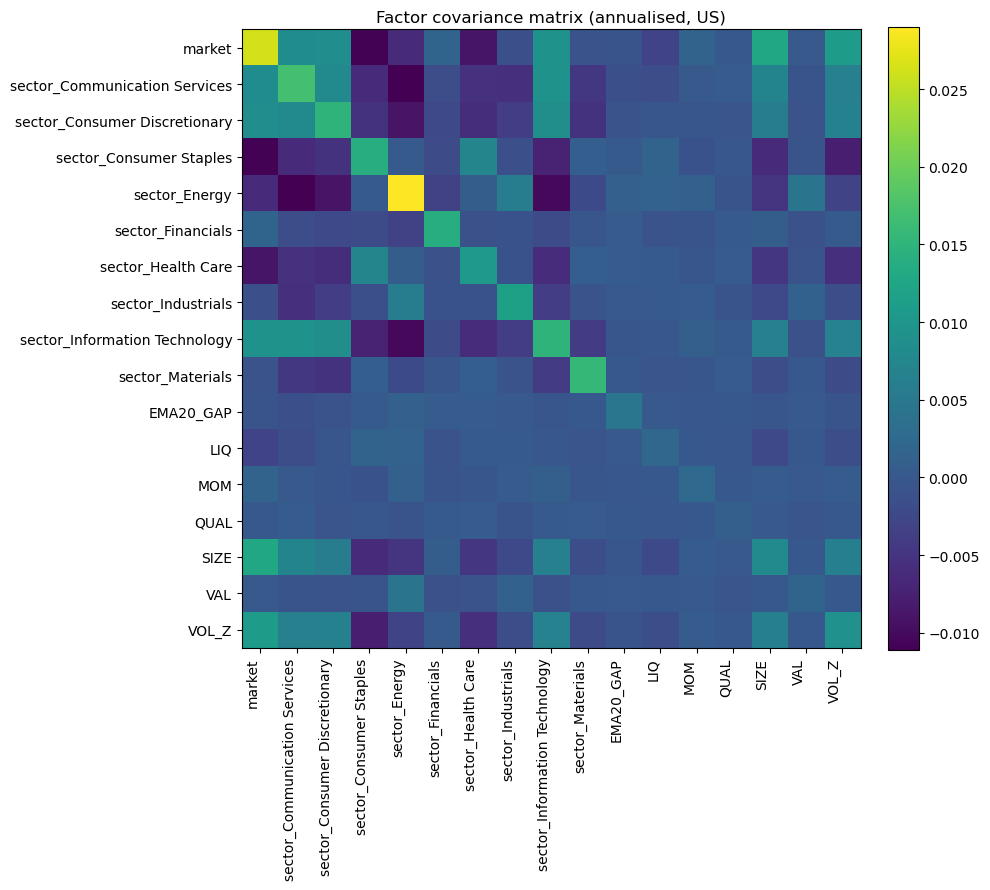

In [16]:
def plot_matrix(mat: pd.DataFrame, title: str):
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(mat.values)
    ax.set_xticks(range(len(mat.columns)))
    ax.set_yticks(range(len(mat.index)))
    ax.set_xticklabels(mat.columns, rotation=90, ha="right")
    ax.set_yticklabels(mat.index)
    ax.set_title(title)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

plot_matrix(corr, "Factor correlation matrix (US)")
plot_matrix(cov, "Factor covariance matrix (annualised, US)")

In [17]:
#-----eigen values---------
eigvals, eigvecs = np.linalg.eigh(cov.values)
eigvals_sorted = np.sort(eigvals)[::-1]
eigvals_sorted

array([ 7.69186834e-02,  3.21785103e-02,  2.08899892e-02,  1.47524648e-02,
        1.07567327e-02,  9.84617575e-03,  8.05198906e-03,  6.31700833e-03,
        4.92578683e-03,  4.45961549e-03,  2.47554058e-03,  2.05127049e-03,
        1.58224314e-03,  1.05799447e-03,  4.62949611e-04,  3.19289674e-04,
       -4.97322815e-18])

In [18]:
#-----Residuals----

# Residuals should be roughly mean-zero and low-vol relative to total returns.

In [19]:
eps.describe()

,AAPL,ABBV,ABT,AMAT,AMD,AMZN,AVGO,CAT,COST,CRM,CSCO,CVX,GE,GOOG,HD,IBM,ISRG,JNJ,KO,LIN,LLY,MA,MCD,META,MRK,MSFT,MU,NFLX,NVDA,ORCL,PEP,PG,PLTR,RTX,TMO,TMUS,TSLA,UNH,V,WMT,XOM
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,-0.000723,0.000340,0.000226,0.000350,0.000370,-0.000107,-0.000705,-0.000256,-0.000012,0.000389,-0.000083,-0.000535,-0.000420,-0.000175,0.000599,-0.000154,0.000224,-0.000184,0.000067,-0.000016,-0.000415,-0.000177,0.000209,-0.000528,0.000344,-0.000341,0.000400,-0.000441,-0.000837,-0.000341,0.000101,0.000083,0.000229,-0.000198,0.000071,-0.000306,0.000525,-0.000122,-0.000136,-0.000302,-0.000838
std,0.014606,0.007931,0.009410,0.009724,0.010014,0.011454,0.008812,0.009374,0.008895,0.010550,0.008429,0.010002,0.011323,0.012328,0.009691,0.008520,0.013391,0.006729,0.007972,0.006234,0.007834,0.006183,0.009023,0.012347,0.007599,0.013836,0.011394,0.011400,0.012008,0.010429,0.007443,0.006161,0.015556,0.009409,0.010134,0.010220,0.013786,0.007543,0.005796,0.006935,0.009699
min,-0.066325,-0.025281,-0.028201,-0.029194,-0.039911,-0.039210,-0.029343,-0.031467,-0.032882,-0.038776,-0.031477,-0.036813,-0.044610,-0.057839,-0.036473,-0.038359,-0.053035,-0.022034,-0.028446,-0.024805,-0.029703,-0.032296,-0.032723,-0.056351,-0.032342,-0.073556,-0.036073,-0.038779,-0.047391,-0.054343,-0.026810,-0.028634,-0.048314,-0.031528,-0.034204,-0.039932,-0.059331,-0.025512,-0.024608,-0.030581,-0.038069
25%,-0.009727,-0.004755,-0.005293,-0.006402,-0.005559,-0.007085,-0.006214,-0.006148,-0.005612,-0.006457,-0.005544,-0.007521,-0.006223,-0.007853,-0.005322,-0.005701,-0.007578,-0.004405,-0.004487,-0.003348,-0.005378,-0.003931,-0.005547,-0.007898,-0.004402,-0.008026,-0.007075,-0.007060,-0.008048,-0.006270,-0.004442,-0.003855,-0.009491,-0.006002,-0.005754,-0.006847,-0.007858,-0.005151,-0.003300,-0.004273,-0.006757
50%,-0.000633,0.000179,-0.000014,0.000092,0.000105,-0.000109,-0.000673,-0.000209,-0.000137,0.000300,-0.000358,-0.000383,-0.000407,-0.000569,0.000530,0.000105,0.000289,-0.000061,0.000243,-0.000143,-0.000426,0.000177,0.000501,-0.000635,0.000410,-0.000533,0.000501,-0.000742,-0.001279,0.000084,0.000343,0.000072,0.001105,-0.000197,-0.000121,-0.000266,0.000340,-0.000329,-0.000188,-0.000355,-0.000366
75%,0.007719,0.005625,0.005872,0.006700,0.006475,0.006941,0.004641,0.005486,0.005483,0.006882,0.005182,0.006586,0.006111,0.006812,0.006932,0.005071,0.007645,0.003982,0.004639,0.003166,0.004588,0.003525,0.005664,0.007073,0.004795,0.007050,0.007069,0.005633,0.005695,0.005935,0.004743,0.003946,0.010118,0.005036,0.006184,0.005894,0.008789,0.004630,0.003067,0.003729,0.005519
max,0.050208,0.031796,0.036504,0.052220,0.050947,0.043425,0.036650,0.034421,0.038326,0.048543,0.035751,0.039920,0.041729,0.058532,0.034324,0.035333,0.054026,0.025784,0.037559,0.025947,0.025267,0.021550,0.029674,0.044009,0.032687,0.053525,0.049008,0.046216,0.041510,0.038906,0.027808,0.019965,0.059948,0.038981,0.044857,0.038611,0.053460,0.032912,0.023777,0.043099,0.028687


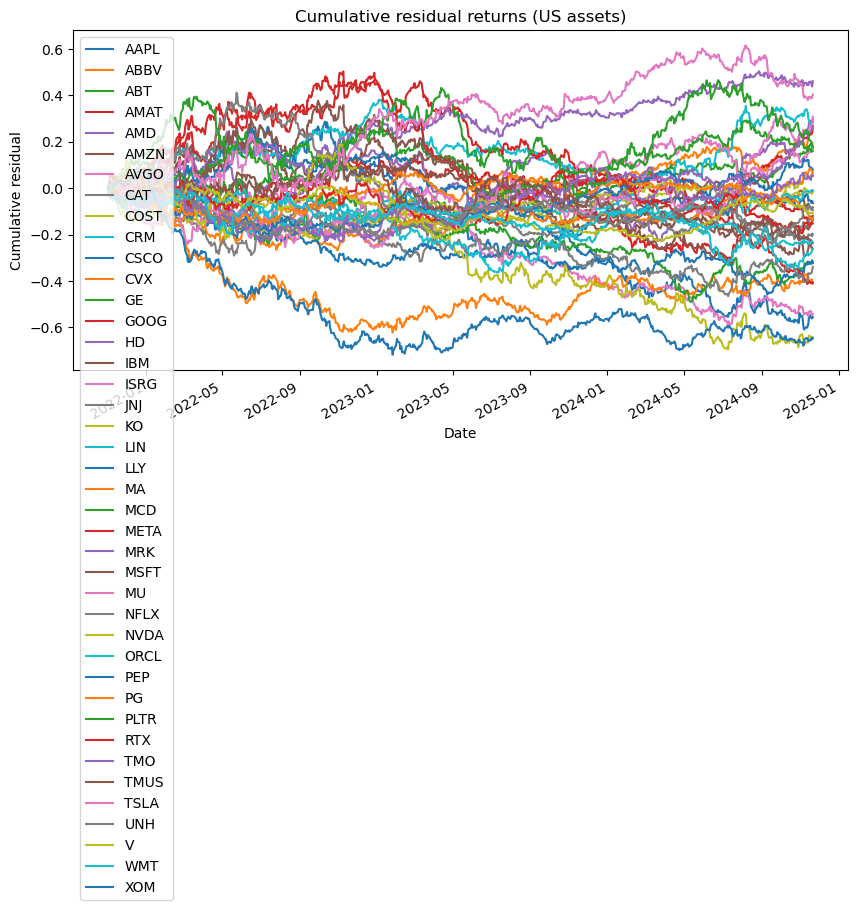

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
eps.cumsum().plot(ax=ax)
ax.set_title("Cumulative residual returns (US assets)")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative residual")
#plt.tight_layout()
plt.show()
fig.savefig(EDA_DIR / "cum_residual_rets.png", dpi=150, bbox_inches="tight")

In [ ]:
# Check residual correlation; ideally low:

eps_corr = eps.corr()
eps_corr

,AAPL,ABBV,ABT,AMAT,AMD,AMZN,AVGO,CAT,COST,CRM,CSCO,CVX,GE,GOOG,HD,IBM,ISRG,JNJ,KO,LIN,LLY,MA,MCD,META,MRK,MSFT,MU,NFLX,NVDA,ORCL,PEP,PG,PLTR,RTX,TMO,TMUS,TSLA,UNH,V,WMT,XOM
AAPL,1.000000,-0.171643,-0.580878,-0.192827,0.138029,0.701016,0.334547,-0.547998,-0.494901,0.227420,0.267272,-0.255213,-0.602542,0.773932,0.480869,0.206467,-0.657839,0.011516,-0.548150,-0.650912,0.197348,0.074945,0.377838,0.732487,-0.238993,0.811861,-0.282708,0.353744,0.705576,0.403753,-0.566234,-0.262457,-0.256301,-0.490476,-0.434424,0.301936,0.757302,0.130696,0.243719,-0.268315,-0.077186
ABBV,-0.171643,1.000000,0.199756,-0.002337,-0.145737,-0.214390,-0.072472,0.083324,0.287578,-0.069076,-0.190103,0.055512,0.001160,-0.120877,-0.125912,-0.063021,0.194650,0.277197,0.217577,0.253167,0.077100,0.128838,-0.197722,-0.189244,0.117099,-0.167903,-0.015981,-0.094436,-0.175676,-0.230872,0.219378,0.193456,-0.084475,-0.075007,0.238560,-0.123646,-0.113904,0.167524,0.077656,0.203390,-0.012005
ABT,-0.580878,0.199756,1.000000,0.103533,-0.150544,-0.516351,-0.182219,0.324898,0.417296,-0.143478,-0.208505,0.112331,0.371747,-0.541402,-0.327393,-0.107319,0.530502,0.129666,0.438956,0.444416,-0.213331,-0.081448,-0.272826,-0.479524,0.182819,-0.538117,0.237809,-0.296235,-0.453236,-0.259254,0.419814,0.258318,0.196582,0.263716,0.445981,-0.259158,-0.489069,-0.124614,-0.158288,0.256240,0.003336
AMAT,-0.192827,-0.002337,0.103533,1.000000,0.145726,-0.173614,0.151478,0.147627,0.065384,-0.052577,-0.073905,-0.093059,0.200515,-0.126311,0.037701,0.035583,0.164840,-0.112766,-0.022893,0.143518,-0.109097,0.063989,-0.048642,-0.110406,-0.012225,-0.225992,0.307049,-0.016404,-0.057882,-0.097386,0.005964,-0.043167,0.067665,0.035896,0.066750,0.088544,-0.225891,-0.096140,-0.077196,-0.096205,-0.090710
AMD,0.138029,-0.145737,-0.150544,0.145726,1.000000,0.174621,0.131055,-0.150449,-0.151931,0.131404,0.150449,-0.127396,-0.094388,0.167028,0.204007,0.167656,-0.170065,-0.090312,-0.139092,-0.160790,-0.009387,-0.123808,0.229443,0.167584,-0.132163,0.169050,0.104659,0.008086,0.307447,0.130633,-0.161799,-0.075494,0.005947,-0.070826,-0.161958,0.107718,-0.029204,-0.046351,-0.090752,-0.123636,-0.128836
AMZN,0.701016,-0.214390,-0.516351,-0.173614,0.174621,1.000000,0.255357,-0.490282,-0.413799,0.195527,0.253317,-0.192352,-0.535620,0.691824,0.391442,0.147601,-0.582243,-0.081006,-0.446267,-0.613945,0.120851,0.128567,0.381269,0.572477,-0.276705,0.743191,-0.263345,0.273183,0.573806,0.394879,-0.472990,-0.244733,-0.237086,-0.427016,-0.380070,0.225318,0.593133,0.062994,0.226912,-0.219437,-0.084709
AVGO,0.334547,-0.072472,-0.182219,0.151478,0.131055,0.255357,1.000000,-0.225424,-0.189101,0.157152,0.166795,-0.206371,-0.227674,0.338745,0.231732,0.201367,-0.237982,-0.071821,-0.237841,-0.294949,-0.004290,0.009152,0.199724,0.291888,-0.106138,0.298972,0.075041,0.159959,0.337376,0.212114,-0.247346,-0.127880,-0.103946,-0.220203,-0.174890,0.171954,0.262436,0.035462,0.032413,-0.174813,-0.135136
CAT,-0.547998,0.083324,0.324898,0.147627,-0.150449,-0.490282,-0.225424,1.000000,0.312664,-0.240109,-0.261401,0.180967,0.294832,-0.486057,-0.294636,-0.161455,0.410414,-0.015099,0.271882,0.441271,-0.137374,-0.019445,-0.318547,-0.502501,0.154156,-0.573550,0.141301,-0.197212,-0.476078,-0.332682,0.321524,0.134425,0.106688,0.218453,0.279593,-0.214986,-0.504160,-0.117726,-0.076398,0.146149,0.051623
COST,-0.494901,0.287578,0.417296,0.065384,-0.151931,-0.413799,-0.189101,0.312664,1.000000,-0.185406,-0.268099,0.177959,0.246773,-0.463683,-0.235208,-0.215936,0.475683,0.228577,0.351288,0.484914,0.014769,0.038786,-0.278396,-0.453327,0.245565,-0.516332,0.126967,-0.286078,-0.485968,-0.354214,0.392268,0.166186,0.073710,0.262076,0.370834,-0.261574,-0.484226,0.013032,-0.001992,0.326942,0.043296
CRM,0.227420,-0.069076,-0.143478,-0.052577,0.131404,0.195527,0.157152,-0.240109,-0.185406,1.000000,0.221898,-0.246251,-0.098262,0.202872,0.034694,0.101882,-0.185121,-0.114495,-0.110011,-0.249833,-0.043747,-0.100158,0.110300,0.179352,-0.017353,0.219202,-0.064648,0.110760,0.3034

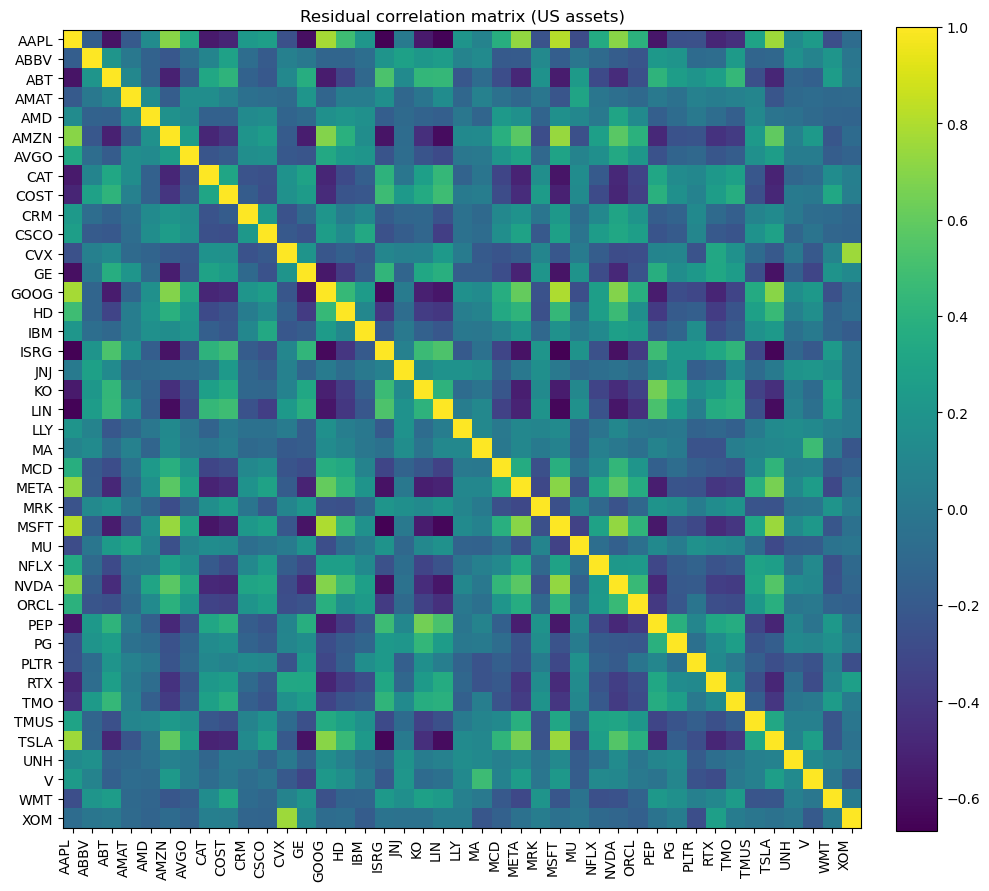

In [ ]:
plot_matrix(eps_corr, "Residual correlation matrix (US assets)")
fig.savefig(EDA_DIR / "residual_corr_matrix.png", dpi=150, bbox_inches="tight")

In [23]:
#-----Factor vs True returns

In [24]:
from src.fm_decompose_us import (
    build_equal_weight_portfolio,
    decompose_portfolio_us,
    sanity_check_decomposition_us,
)
from src.fm_factor_panel import build_us_factor_panel

# Load factor panel (ret + exposures)
factor_panel = pd.read_parquet(DATA_INT / "factor_panel_us.parquet")

# Build equal-weight portfolio over all available assets
tickers_model = list(eps.columns)
dates_model = fac_ret.index

weights_eq = build_equal_weight_portfolio(
    tickers=tickers_model,
    dates=dates_model,
)

factor_contrib, resid_contrib, total_from_model = decompose_portfolio_us(
    weights=weights_eq,
    factor_panel=factor_panel,
    factor_returns=fac_ret,
    residuals=eps,
)

true_ret, model_ret, diff, rmse, max_abs_diff = sanity_check_decomposition_us(
    weights=weights_eq,
    factor_panel=factor_panel,
    total_from_model=total_from_model,
)

rmse, max_abs_diff

(0.0014236578066900685, 0.00828486386478378)

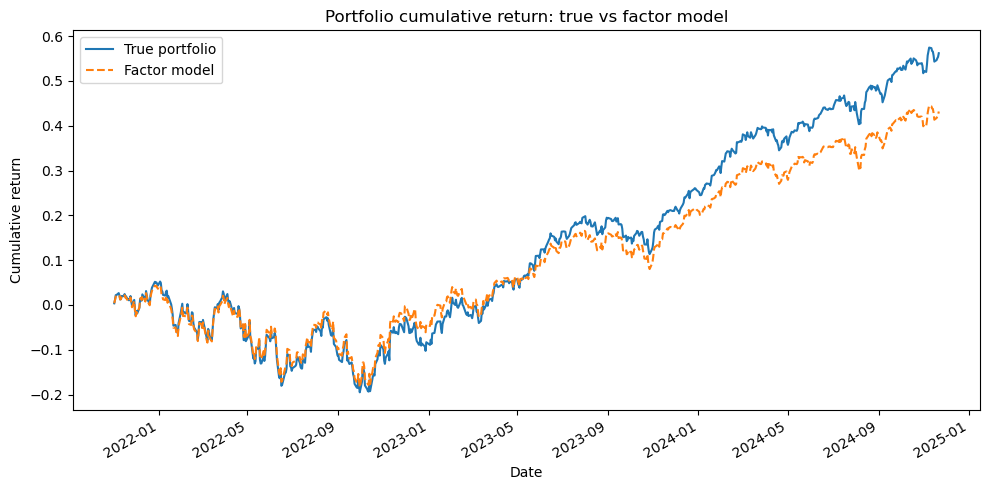

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
true_ret.cumsum().plot(ax=ax, label="True portfolio")
model_ret.cumsum().plot(ax=ax, linestyle="--", label="Factor model")
ax.legend()
ax.set_title("Portfolio cumulative return: true vs factor model")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative return")
plt.tight_layout()
plt.show()
fig.savefig(EDA_DIR / "factor_cumret_us.png", dpi=150, bbox_inches="tight")

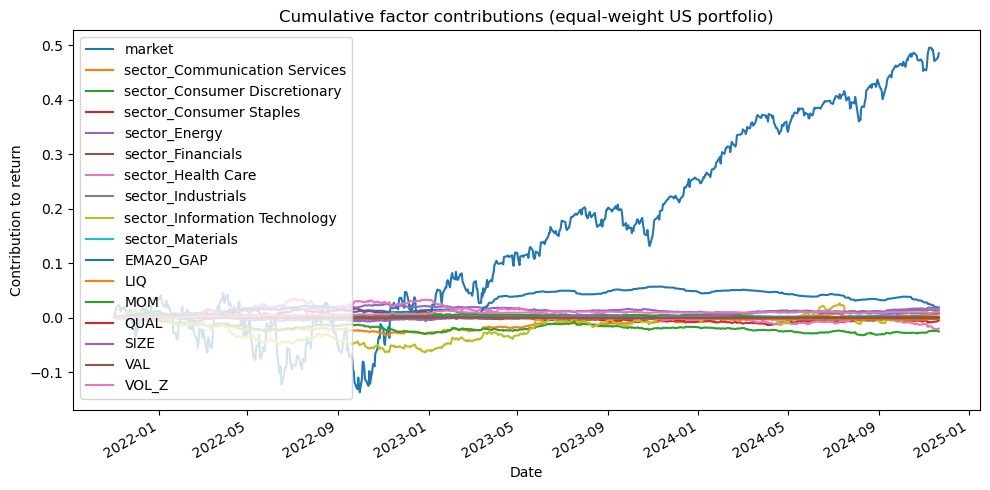

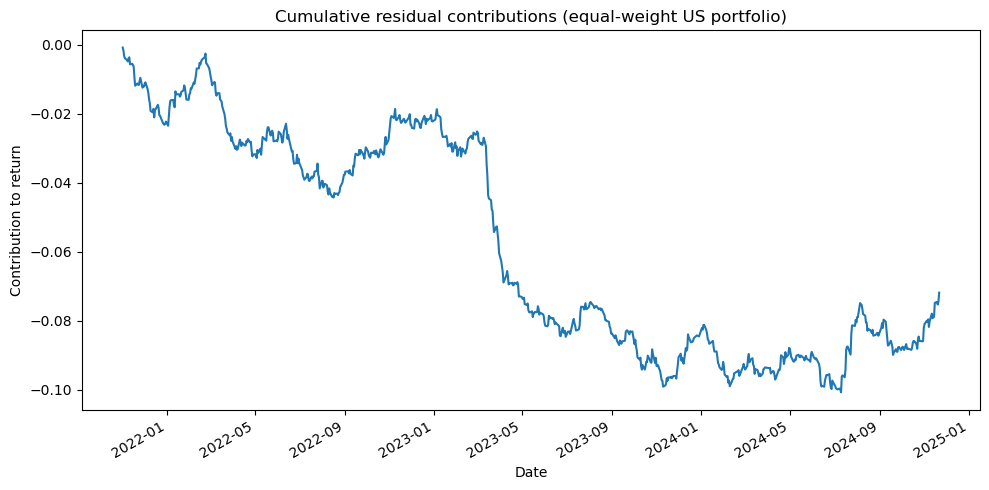

In [26]:
factor_contrib.cumsum().plot(figsize=(10, 5))
plt.title("Cumulative factor contributions (equal-weight US portfolio)")
plt.xlabel("Date")
plt.ylabel("Contribution to return")
plt.tight_layout()
plt.show()
fig.savefig(EDA_DIR / "cum_factor_contrib.png", dpi=150, bbox_inches="tight")

resid_contrib.cumsum().plot(figsize=(10, 5))
plt.title("Cumulative residual contributions (equal-weight US portfolio)")
plt.xlabel("Date")
plt.ylabel("Contribution to return")

plt.tight_layout()
plt.show()

fig.savefig(EDA_DIR / "cum_resid_contrib.png", dpi=150, bbox_inches="tight")

In [27]:
#------Per-factor “risk budget”----------

# useful to see if market absolutely dominates risk.

In [28]:
# Example: equally exposed across factors (just as a toy)
K = cov.shape[0]
w_f = np.ones(K) / np.sqrt(K)  # normalised for convenience

# Factor variance contribution per factor (diagonal of w_i w_j Sigma_ij)
var_total = float(w_f.T @ cov.values @ w_f)
marginal = cov.values @ w_f
component = w_f * marginal
var_contrib = pd.Series(component / var_total, index=cov.index)

var_total, var_contrib

(0.005940036033632338,
 market                           0.476731
 sector_Communication Services    0.185526
 sector_Consumer Discretionary    0.174914
 sector_Consumer Staples         -0.246619
 sector_Energy                   -0.066574
 sector_Financials                0.008533
 sector_Health Care              -0.187933
 sector_Industrials              -0.033362
 sector_Information Technology    0.216550
 sector_Materials                -0.051034
 EMA20_GAP                        0.026463
 LIQ                             -0.049954
 MOM                              0.048693
 QUAL                            -0.000470
 SIZE                             0.245346
 VAL                              0.012291
 VOL_Z                            0.240901
 dtype: float64)

In [29]:
#------Saving Outputs-------

In [30]:
summary.to_csv(EDA_DIR / "factor_summary_us.csv", index=True)
corr.to_csv(EDA_DIR / "factor_corr_us.csv", index=True)
cov.to_csv(EDA_DIR / "factor_cov_us.csv", index=True)
eps_corr.to_csv(EDA_DIR / "residual_corr_us.csv", index=True)